# understanding data 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/kaggle/input/fitness-classification-dataset-synthetic/fitness_dataset.csv')

In [2]:
df.head(10)

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1
5,25,172,85,81.2,119.2,7.7,7.35,4.08,yes,M,0
6,78,193,83,79.6,132.5,7.4,2.16,3.42,yes,F,0
7,38,188,57,81.2,110.6,6.6,8.47,4.96,0,M,1
8,56,164,108,70.1,140.9,9.1,4.15,2.06,no,F,0
9,75,198,55,67.1,129.5,8.1,0.36,1.25,0,F,0


- We need to detect any zeros in the smoke fields.

In [3]:
# Get the shape of the dataset
print("Shape of the dataset:", df.shape)

# Get the column names
print("Column names:", df.columns)

# Get the data types of each column
print("Data types:", df.dtypes)

# Check for missing values
print("Missing values:", df.isnull().sum())


Shape of the dataset: (2000, 11)
Column names: Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'gender', 'is_fit'],
      dtype='object')
Data types: age                    int64
height_cm              int64
weight_kg              int64
heart_rate           float64
blood_pressure       float64
sleep_hours          float64
nutrition_quality    float64
activity_index       float64
smokes                object
gender                object
is_fit                 int64
dtype: object
Missing values: age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64


- We are gonna use the median in sleep hours. 

In [4]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,1840.000000,2000.000000,2000.000000,2000.000000
mean,49.114000,174.53300,83.540500,70.288600,119.908850,7.513315,5.035140,2.999040,0.399500
std,17.926564,14.37175,25.852534,11.846339,14.578032,1.502031,2.864156,1.136383,0.489918
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.700000,6.500000,2.547500,2.037500,0.000000
50%,49.000000,174.00000,83.000000,70.250000,120.000000,7.500000,5.065000,2.980000,0.000000
75%,65.000000,187.00000,102.000000,78.425000,129.800000,8.600000,7.470000,3.950000,1.000000
max,79.000000,199.00000,250.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000


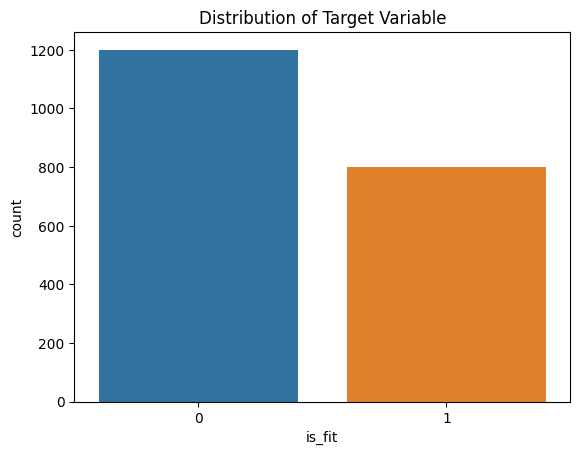

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


target_column = 'is_fit'  

# Plot the distribution of the target variable
sns.countplot(x=target_column, data=df)
plt.title('Distribution of Target Variable')
plt.show()


- almost balanced. There is no need for an imputation technique

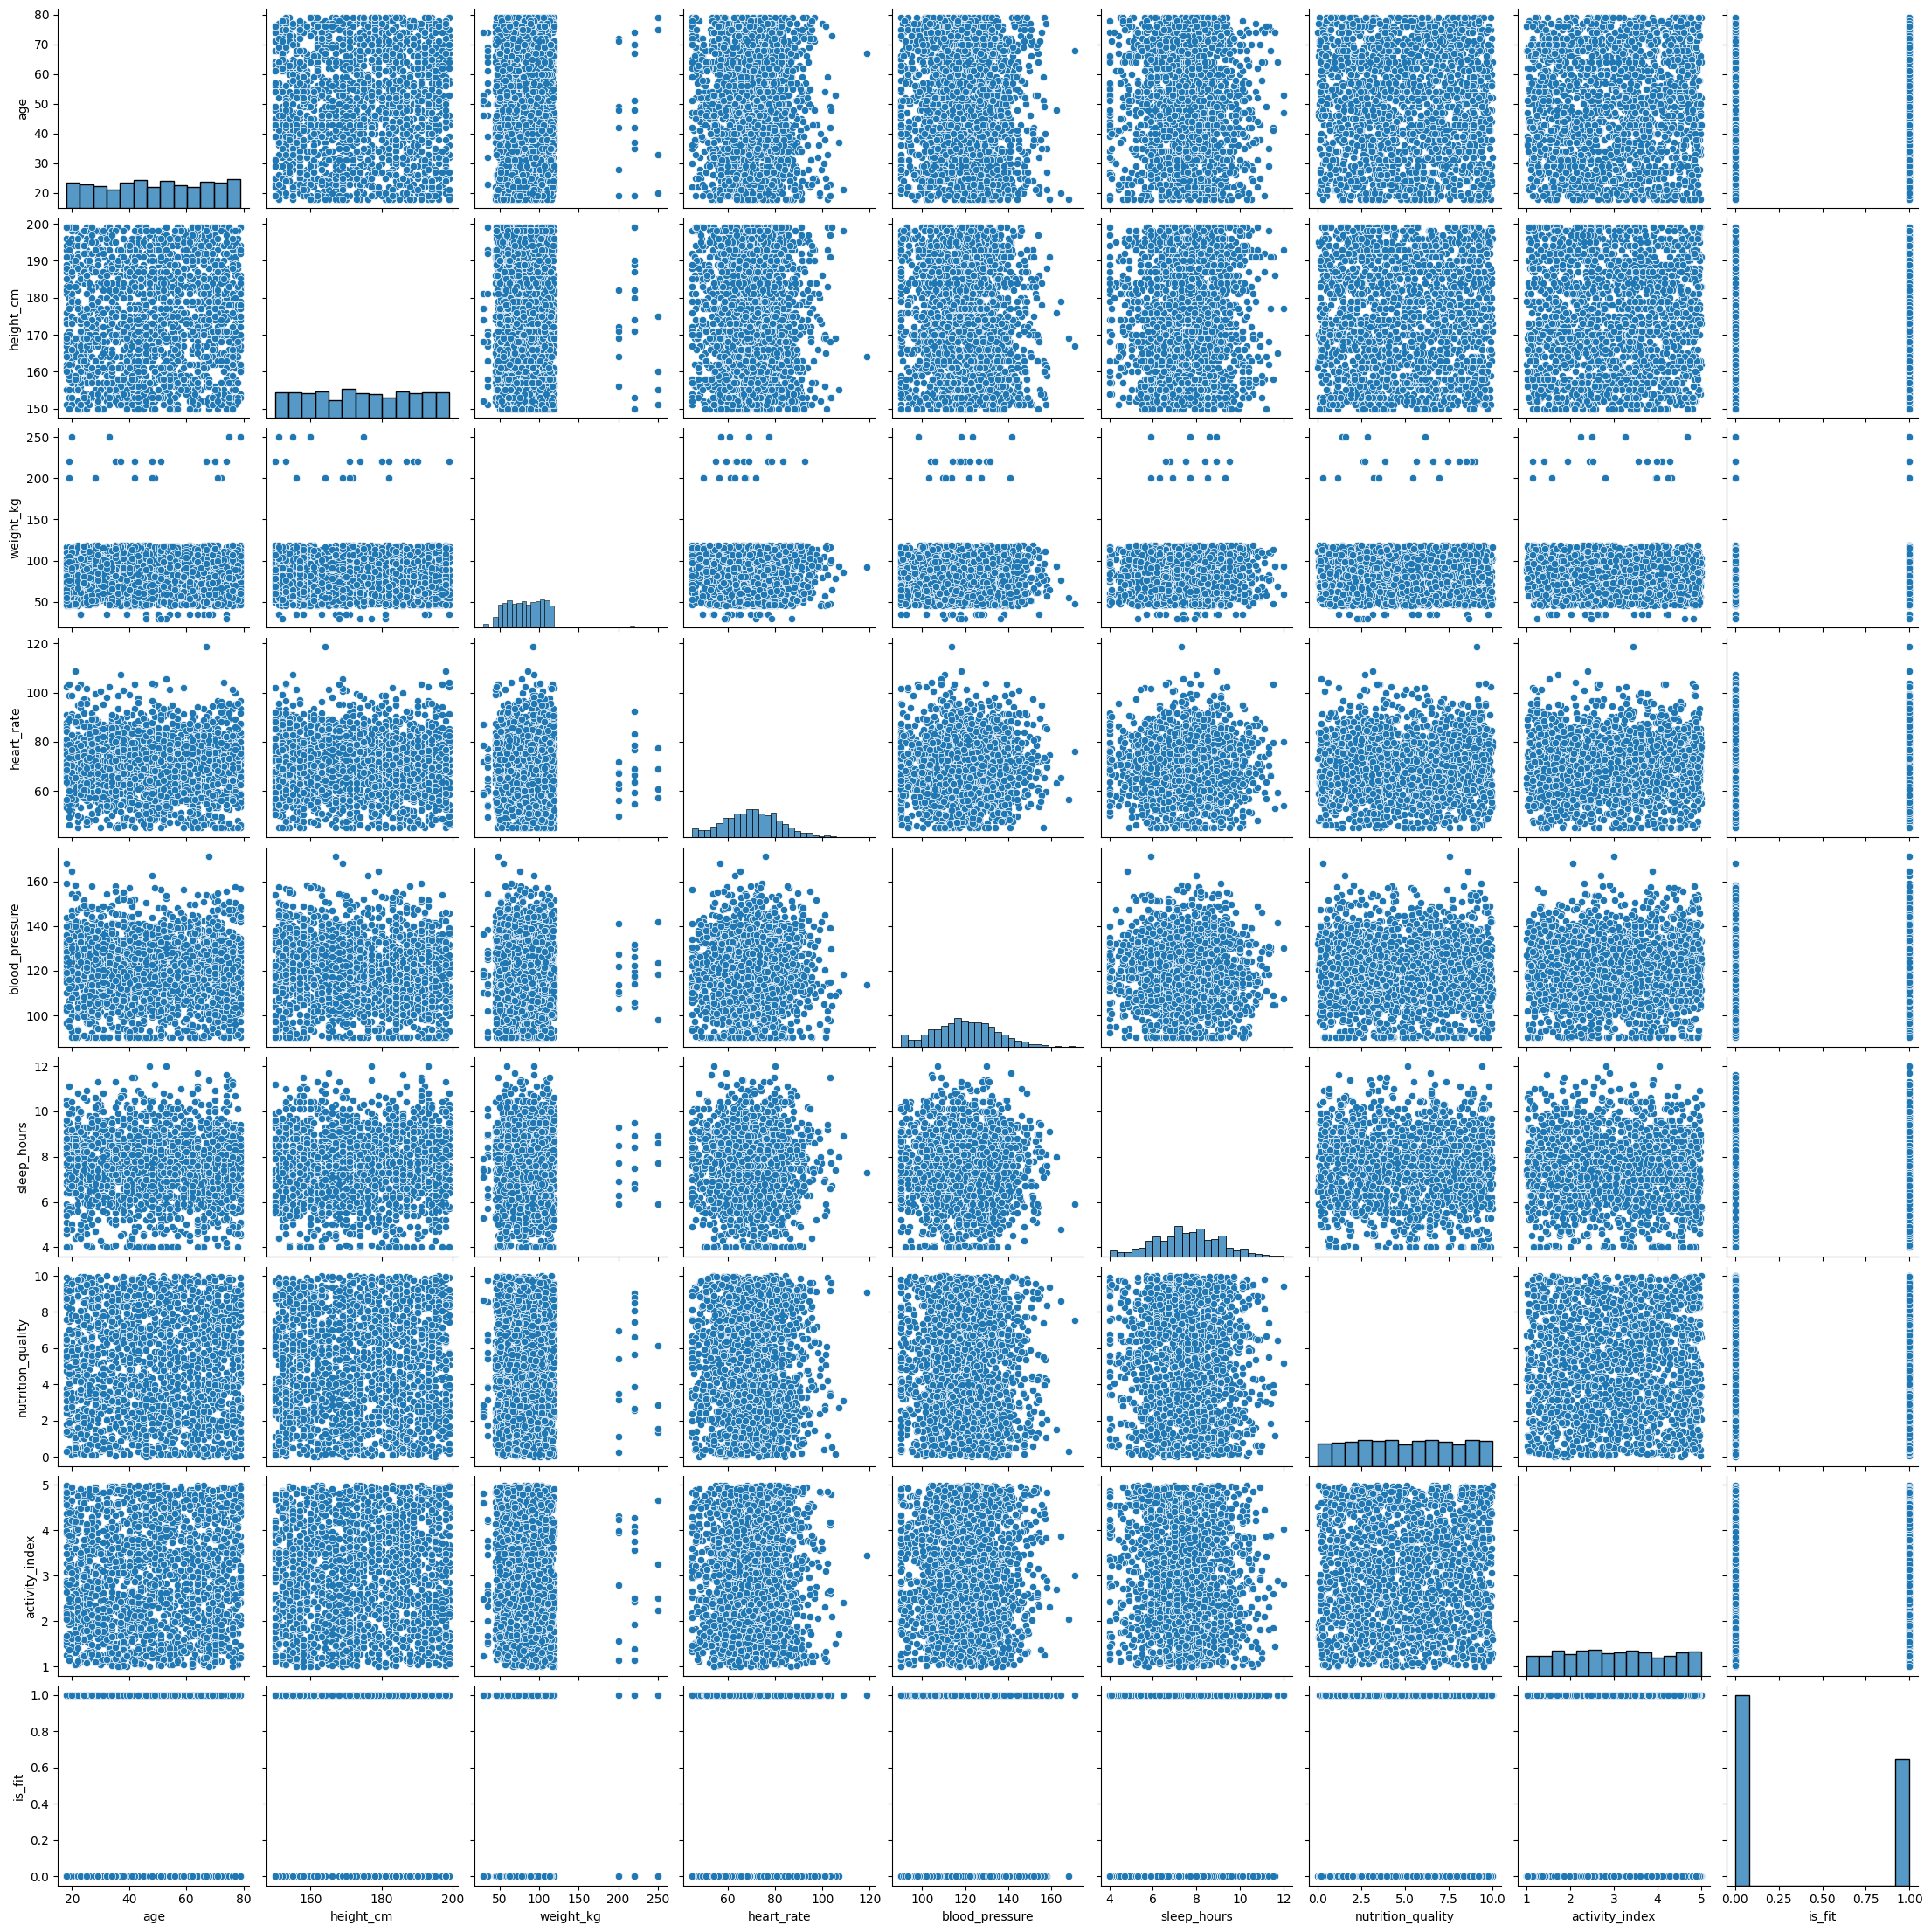

In [6]:
# Pairplot for numerical features
sns.pairplot(df)
plt.show()

# EDA

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

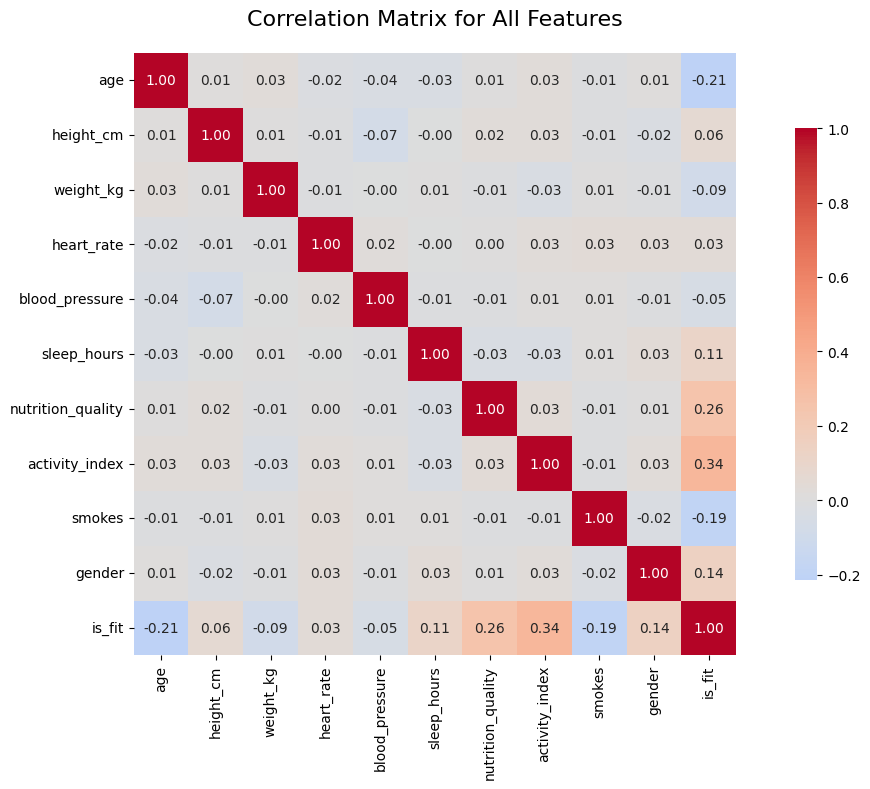

In [8]:
# Calculate correlation
corr = df_encoded.corr()

# Plot the heatmap in one figure
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Matrix for All Features", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

- Top positive correlation with is_fit:activity_index (0.34) → Not surprisingly, being active is strongly tied to being fit.
nutrition_quality (0.26) → Eating well shows moderate association.
sleep_hours (0.11) → Slight positive relationship.

- Top negative correlation with is_fit:age (-0.21) → Younger people are tending to be “fitter” here.
smokes (-0.19) → Smoking is a fitness downer.
weight_kg (-0.09) → Weak, but slightly negative association.

